<a href="https://colab.research.google.com/github/jeochris/DL-Lecture-Study/blob/main/imageCrawler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image crawler example
In this Python notebook we implement an image crawler through selenium. 

1. Make screen shots using youtube image

2. Edit screen shots through the "pillow" package


mac:  pip3 install pillow

window: 

conda install -c anaconda pillow

conda uninstall pillow

conda install -c conda-forge pillow



In [ ]:
from PIL import Image as pil
import time
from selenium import webdriver

### 1. Set url and define webdriver 

In [ ]:
url = "https://www.youtube.com/watch?v=2S1sGZxj50Q&t=340s"

### 2. Take screen shots

https://chromedriver.chromium.org/downloads

Different chromedrivers may have to be downloaded depending on your laptop. 

In [ ]:
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)
driver.save_screenshot("screenshot.png")

for idx in range(3):
    time.sleep(1)
    driver.save_screenshot("screenshot" + str(idx) + ".png")

Following image contains the entire browser. 

(1295, 842)


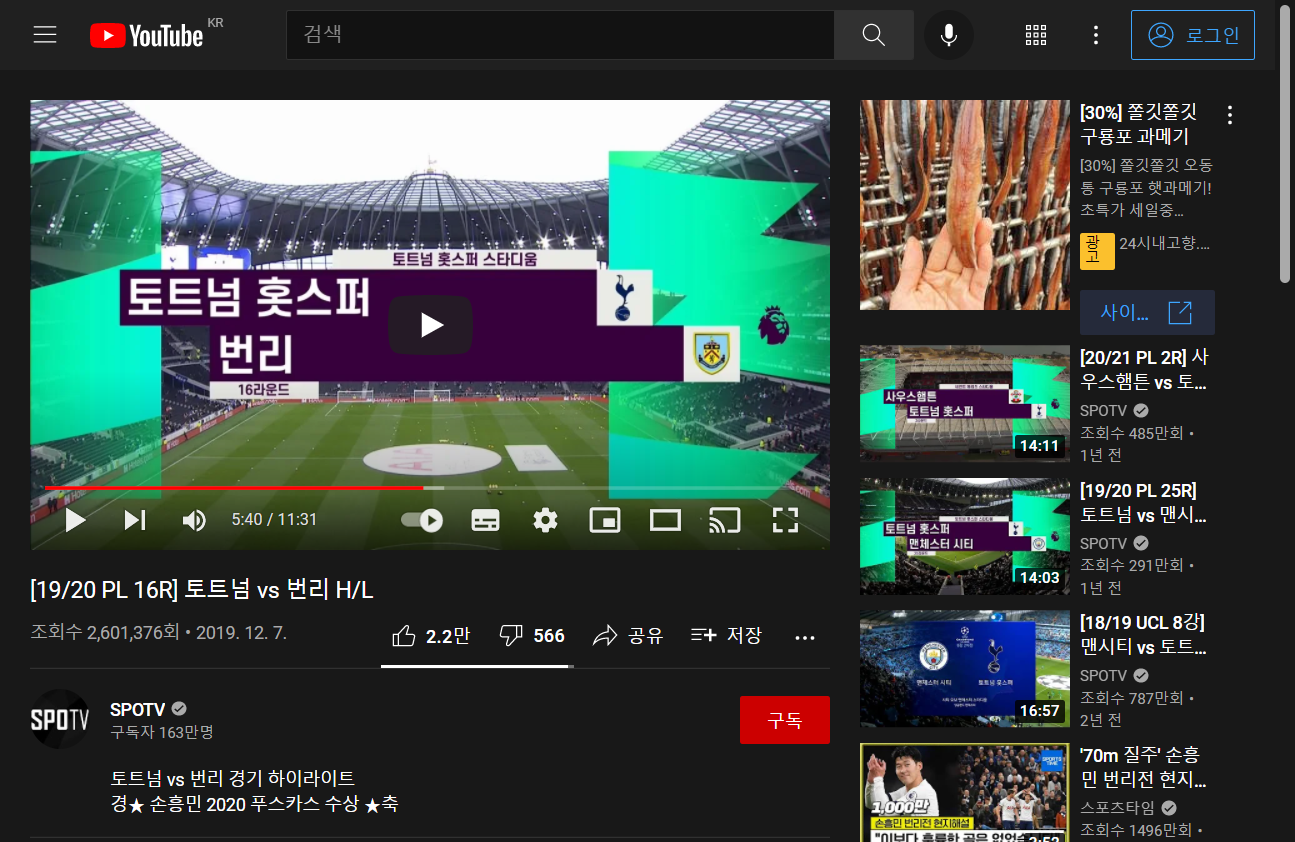

In [ ]:
pil_im = pil.open("screenshot.png")
print(pil_im.size)
pil_im

# can check image resolution

### 3. Edit screen shots

get location for the video player

Based on image size, cut the screen shot

In [ ]:
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size

({'x': 608, 'y': 215}, {'height': 225, 'width': 400})

Cut images: specify top, bottom, left, right

For retina display you need to multiply 2 

In [ ]:
left = location["x"]*1
top = location ["y"]*1
right = left + size["width"]*1
bottom = top + size["height"]*1
area = (left, top, right, bottom)
area

# main area to cut

(608, 215, 1008, 440)

In [ ]:
pil_im = pil_im.crop(area)
pil_im.save("screenshot_element.png")

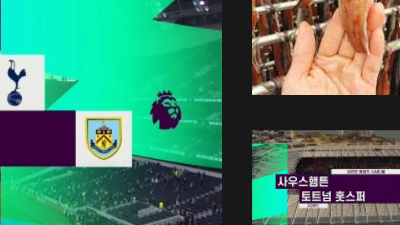

In [ ]:
pil_im = pil.open("screenshot_element.png")
pil_im

In [ ]:
element = driver.find_element_by_css_selector(".ytp-chrome-bottom")
playbar_height = element.size["height"]

In [ ]:

left = location["x"] * 1
top = location ["y"] * 1
right = left + size["width"] * 1
bottom = top + size["height"] *1 - playbar_height *1 # cut more on bottom
area = (left, top, right, bottom)
area

(608, 215, 1008, 389)

In [ ]:

pil_im = pil.open("screenshot.png")
pil_im = pil_im.crop(area)
pil_im.save("screenshot_element2.png")

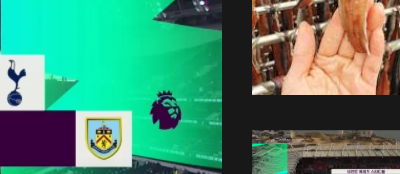

In [ ]:
pil_im = pil.open("screenshot_element2.png")
pil_im

In [ ]:
pil_im.size

(400, 174)

In [ ]:
driver.quit()